# Getting Started with pyGAM

## Introduction

Generalized Additive Models (GAMs) are smooth semi-parametric models of the form:

$$
    g(\mathbb{E}[y|X]) = \beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)
$$

where `X.T = [X_1, X_2, ..., X_N]` are independent variables, `y` is the dependent variable, and `g()` is the link function that relates our predictor variables to the expected value of the dependent variable.

The feature functions `f_i()` are built using **penalized B splines**, which allow us to **automatically model non-linear relationships** without having to manually try out many different transformations on each variable.


![Basis splines](pygam_basis.png)

GAMs extend generalized linear models by allowing non-linear functions of features while maintaining additivity. Since the model is additive, it is easy to examine the effect of each `X_i` on `Y` individually while holding all other predictors constant.

The result is a very flexible model, where it is easy to incorporate prior knowledge and control overfitting.



In [2]:
from pygam import *
from pygam.datasets import wage

from matplotlib import pyplot as plt

In [3]:
X, y = wage()
gam = LinearGAM(s(0) + s(1) + f(2)).fit(X, y)

<Figure size 432x288 with 0 Axes>

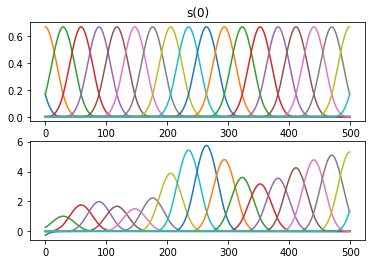

<Figure size 432x288 with 0 Axes>

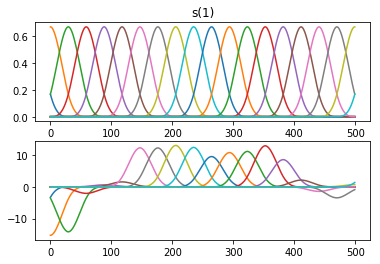

<Figure size 432x288 with 0 Axes>

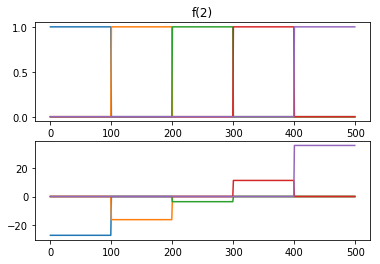

In [26]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    # points at which to evaluate the splines
    XX = gam.generate_X_grid(term=i, n=500)
    
    # the splines
    splines = gam._modelmat(XX, term=i).A
    
    plt.figure()
    fig, axs = plt.subplots(2, 1)
    
    # plot unweighted p-splines
    axs[0].plot(splines)
    axs[0].set_title(repr(term))
    
    # plot weighted p-splines
    idxs = gam.terms.get_coef_indices(i)
    axs[1].plot(splines * gam.coef_[idxs])
    
    plt.show()
    

In [23]:
repr(gam.terms[0])

's(0)'

In [12]:
XX.shape

(100, 3)

In [ ]:
splines[:]